# Fetching MNIST Dataset
### 2.3 fetching_MNIST_dataset.ipynb
### James Saslow
### 4/29/2024

_______________________________________________________________________________________________________________________________________


The MNIST digits classification dataset from the Keras library is a $28 \times 28$ feature dataset with 60,000 pre-allocated training samples and 10,000 testing samples. The MNIST dataset has 9 classes of data, one for each handwritten digit 0 through 9. Each feature is a grayscale pixel value of the $28 \times 28$ pixel image. We combine the pre-allocated training and testing datasets into one dataset and filter out the dataset for handwritten 0's and 1's to do binary classification. This results in a filtered data set of $14780$ instances. 


We also have a very apparent problem with our feature dimensionality. Each data point has $28\times 28 = 784$ features and our model can only take in $2$ input features. We can apply PCA to reduce the dimensionality of each data point from $784 \rightarrow 2$. However, before we begin PCA, We should flatten each $28 \times 28$ matrix into a vector, then normalize that vector to prevent the PCA from absorbing large numbers.


After plotting the PCA data, we notice an oval cluster form for the 'zeros' and a c-shaped cluster form for the 'ones'.

In [39]:
# Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from sklearn.decomposition import PCA

In [40]:
# Importing MNIST Dataset
(X1, Y1), (X2, Y2) = mnist.load_data()

# Combining Predefined Training & Testing data into one single dataset
X = np.vstack((X1,X2))
Y = np.hstack((Y1,Y2))


# Printing Data Dimensionality
print(X.shape)
print(Y.shape)

(70000, 28, 28)
(70000,)


In [41]:
# Only Filtering out the Datasamples that are a '0' or '1'
mask = np.isin(Y, [0, 1])

X_binary = X[mask]
Y_binary = Y[mask]


print(X_binary.shape)
print(Y_binary.shape)

(14780, 28, 28)
(14780,)


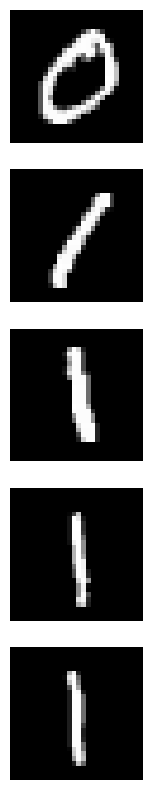

In [42]:
# Printing the first few images to check that we only have 0's and 1's in the dataset

plt.figure(figsize=(50, 10))
for i in range(0,5):
    plt.subplot(5, 1, i+1)  # Create a subplot for each image
    plt.imshow(X_binary[i], cmap='gray')  # Display the grayscale image
    plt.axis('off')  # Turn off axis labels
plt.show()  # Show the plot with all 5 images

In [44]:
# Flattening each matrix into an array
X_flat = X_binary.reshape(X_binary.shape[0], -1)

print(X_flat.shape)

(14780, 784)


In [45]:
# Normalizing each vector to avoid large numbers in PCA Transformation

X_normalized = np.zeros((14780, 784))

for i in range(14780):
    vec = X_flat[i,:]
    
    norm = 0
    for j in range(len(vec)):
        norm += (vec[j])**2

    norm = np.sqrt(norm)

    X_normalized[i,:] = vec/norm

In [46]:
# Doing PCA Analysis to reduce the dimensionality to 2

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_normalized)

print(X_pca.shape)

(14780, 2)


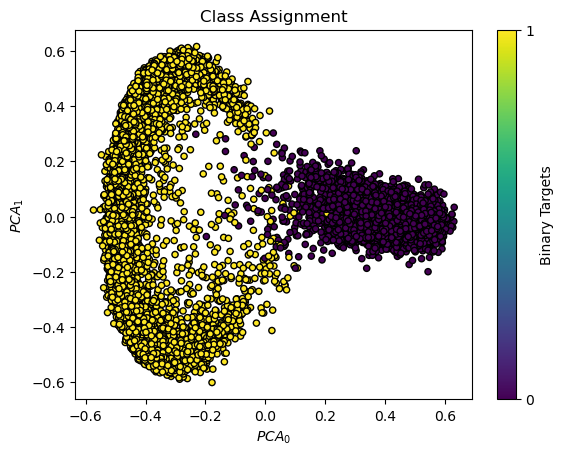

In [48]:
# Data Visualization

# Plotting the PCA data  and their class assignment

plt.title('Class Assignment')
plt.scatter(X_pca[:,0], X_pca[:,1], c = Y_binary, edgecolors='black', s = 20)
plt.xlabel('$PCA_{0}$')
plt.ylabel('$PCA_{1}$')
plt.colorbar(label='Binary Targets', ticks=[0, 1]) 
plt.show()

In [9]:
# Preparing a Pandas DataFrame

data = {
    "PCA_0" : X_pca[:,0],
    "PCA_1" : X_pca[:,1],
    "targets": Y_binary
}

df = pd.DataFrame(data)


df = df.sample(frac=1) # Randomly Shuffling around data

df

,PCA_0,PCA_1,targets
7657,0.073918,0.143390,0
9857,-0.335466,-0.460649,1
12370,-0.490993,-0.074950,1
3099,-0.486791,0.233593,1
6057,-0.452474,0.409029,1
...,...,...,...
5374,-0.511952,-0.153286,1
14009,-0.255648,0.597400,1
906,-0.471805,-0.003353,1
8519,-0.492540,-0.214135,1


In [10]:
# Exporting the Dataframe to a csv file
df.to_csv('MNIST_dataset.csv', index = False)